In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data = pd.read_csv("CLeaned Merged Dataset.csv")

In [2]:
Data.head(5)

,title,year,kdrama_id,director,screenwriter,tot_eps,duration,start_dt,end_dt,aired_on,...,content_rt,synopsis,rank,pop,music_score,story_score,acting_cast_score,rewatch_value_score,overall_score,n_helpful
0,The Family Is Coming,2015.0,9170c31a02014b56bb4cec2105086f00,['Joo Dong Min'],['Kim Shin Hye'],20.0,3600.0,1/3/2015,3/15/2015,"Saturday, Sunday",...,15+ - Teens 15 or older,A grandma has abandoned her family 50 years ag...,7995.0,4289.0,6.0,7.8,8.2,6.0,8.0,6.0
1,The Lover,2015.0,2dc531911bd1454288c468ed8de78f4e,['Kim Tae Eun'],['Kim Min Seok'],12.0,3000.0,4/2/2015,6/25/2015,Thursday,...,18+ Restricted (violence & profanity),The series talk about four different couples l...,5486.0,527.0,7.7,8.5,9.0,8.0,8.7,15.0
2,Love of Eve,2015.0,832b2dcd1ac941348f0dcf54972a7eb0,['Lee Gye Joon'],Others,120.0,2400.0,5/18/2015,10/30/2015,"Monday, Tuesday, Wednesday, Thursday, Friday",...,15+ - Teens 15 or older,Three women share a close bond that was deeper...,54646.0,12387.0,1.0,3.0,3.0,1.0,3.0,1.0
3,Love on a Rooftop,2015.0,5eda227cf639445cbbe1ed6531e28d2d,['Choi Ji Yeong'],"['Choi Min Ki', 'Kim Ji Wan']",101.0,2100.0,4/6/2015,8/21/2015,"Monday, Tuesday, Wednesday, Thursday, Friday",...,15+ - Teens 15 or older,A drama about a woman who finally becomes a pa...,8341.0,7469.0,5.0,5.4,5.1,3.0,5.1,5.0
4,"Kill Me, Heal Me",2015.0,e8c09f0f7d0d4b75a4642eb06d76d811,"['Kim Jin Man', 'Kim Dae Jin']",['Jin Soo Wan'],20.0,3720.0,1/7/2015,3/12/2015,"Wednesday, Thursday",...,15+ - Teens 15 or older,A traumatic childhood experience leaves Cha Do...,232.0,29.0,8.8,8.5,9.0,8.0,8.7,59.0


In [3]:
# Summary Statistics
# Data = Data.drop('year', axis=1)
Data = Data.drop('org_net', axis=1)
Data['year'] = Data['year'].astype(int)
print("Summary statistics for numerical columns:")
print(Data.drop('year', axis=1).describe())

Summary statistics for numerical columns:
           tot_eps     duration          rank           pop  music_score  \
count  1248.000000  1248.000000   1248.000000   1248.000000  1248.000000   
mean     21.989583  2633.365385   8390.339744   3028.596955     7.345753   
std      26.732343  1439.403185  14502.995524   3358.919573     1.505301   
min       1.000000   120.000000      9.000000      1.000000     1.000000   
25%      10.000000  1140.000000   1592.250000    571.500000     6.700000   
50%      16.000000  2700.000000   3876.000000   1713.000000     7.600000   
75%      18.000000  3900.000000   6896.250000   4299.250000     8.300000   
max     150.000000  6300.000000  62723.000000  15980.000000    10.000000   

       story_score  acting_cast_score  rewatch_value_score  overall_score  \
count  1248.000000        1248.000000          1248.000000    1248.000000   
mean      7.477644           8.318910             6.033654       7.588542   
std       1.322147           1.139202     

The mean the median for music_score, story_score,  acting_cast_score,  rewatch_value_score,  overall_score are very close. They are normally distributed

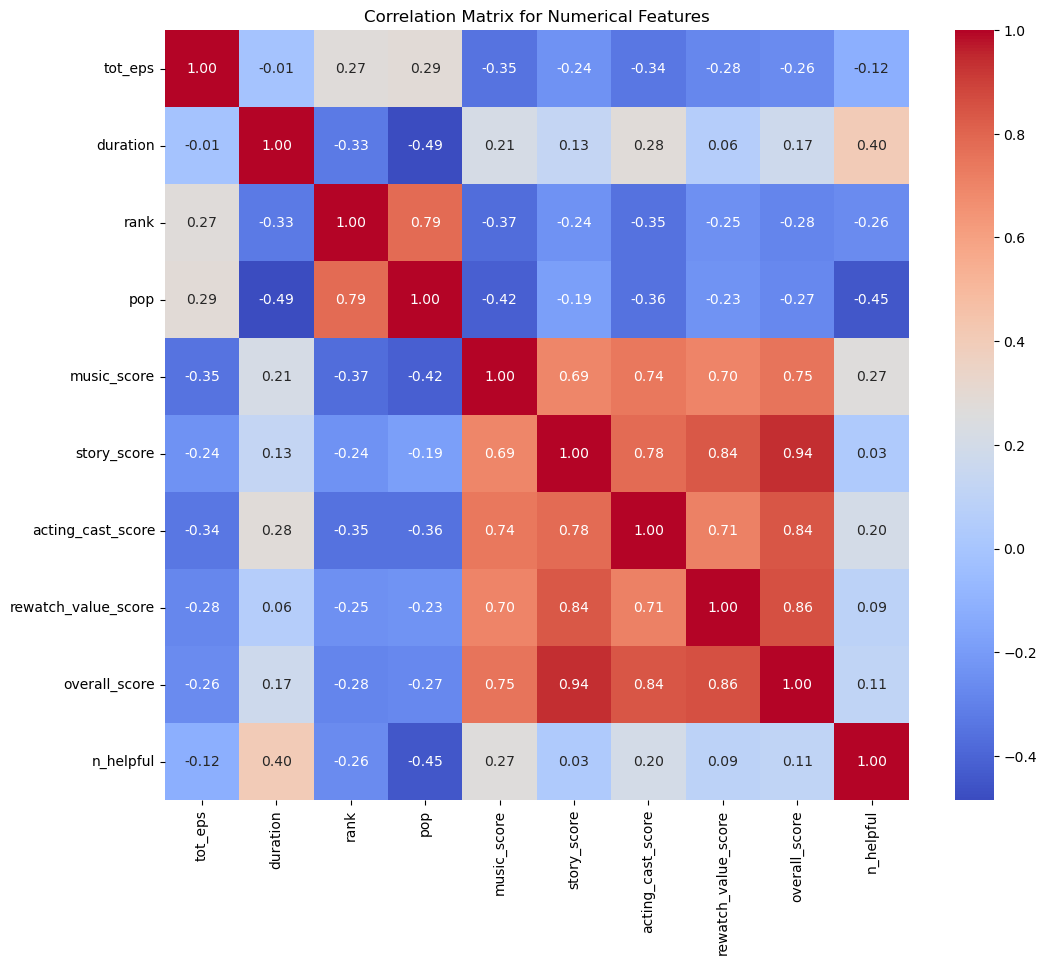

In [4]:
# Correlation Matrix
# Select numerical columns only
num_cols = Data.drop('year', axis=1).select_dtypes(include=[np.number]).columns
corr = Data[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

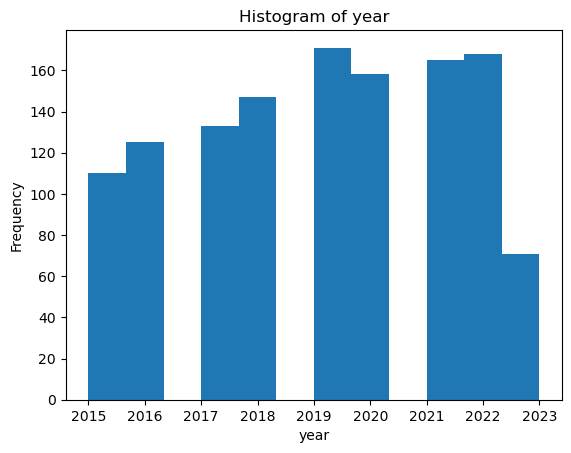

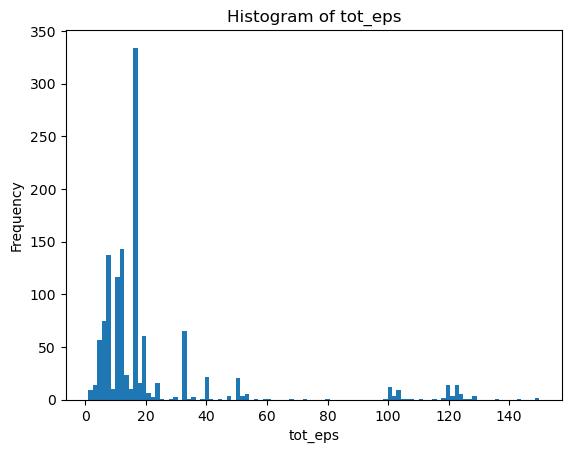

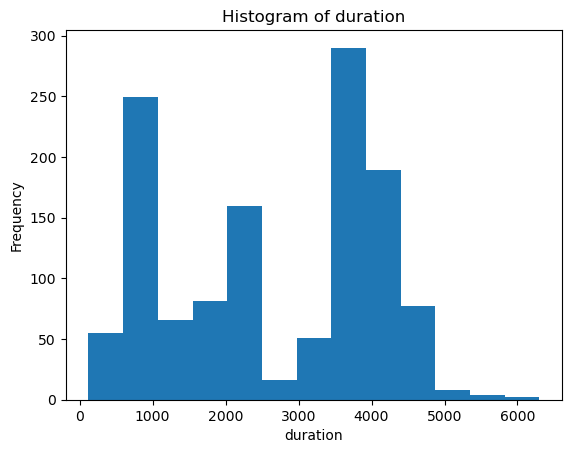

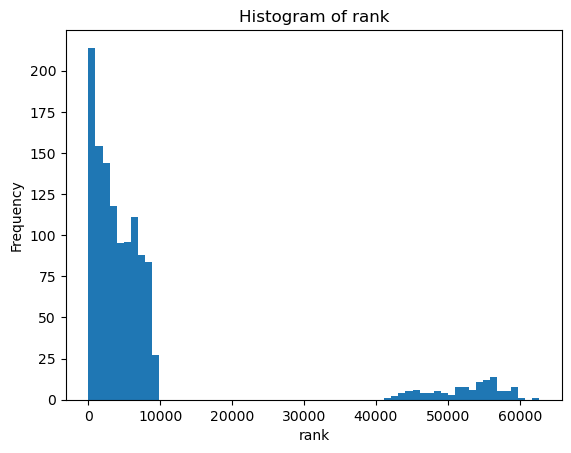

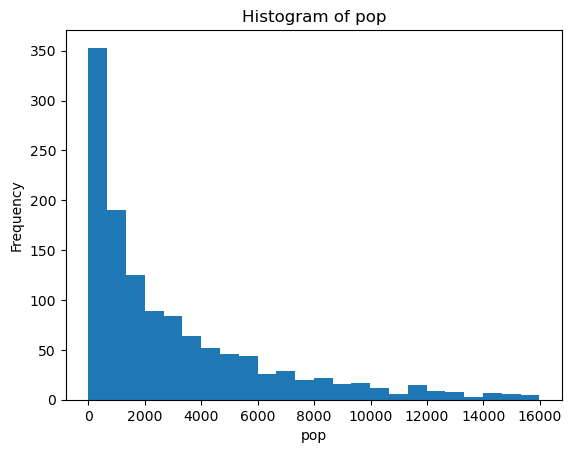

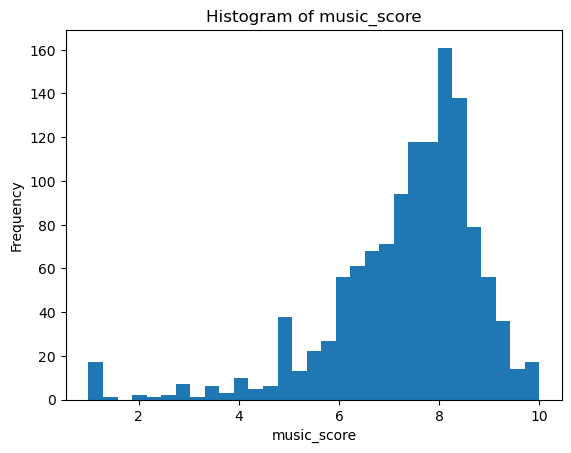

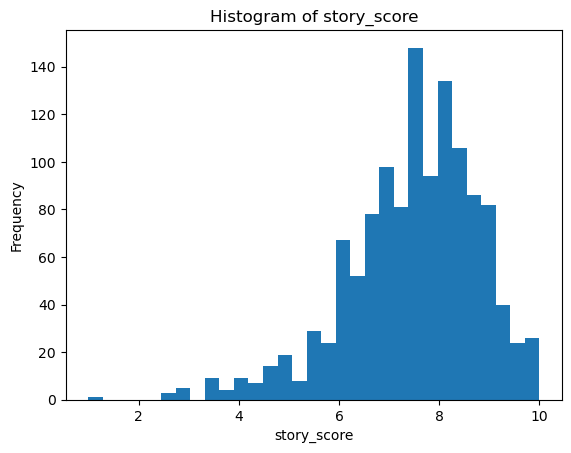

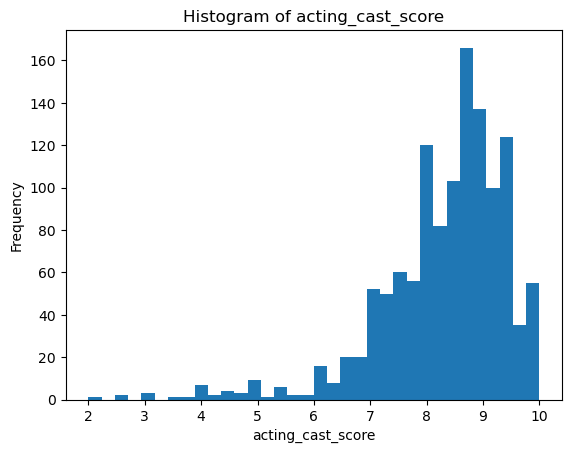

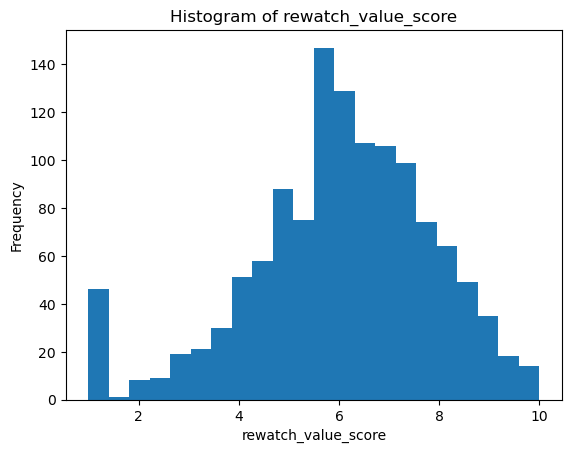

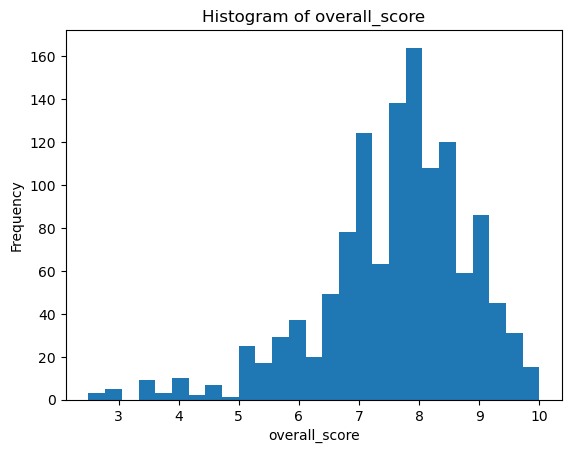

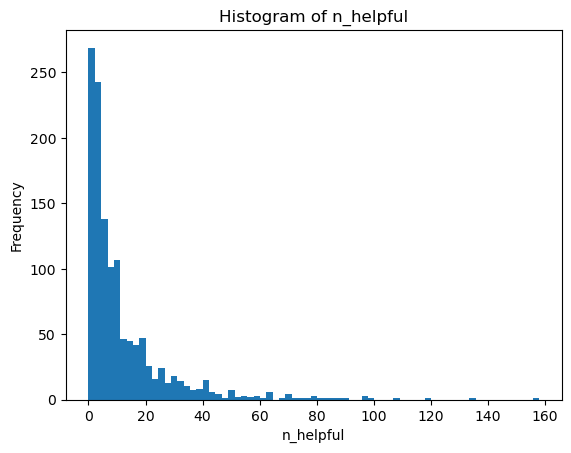

In [5]:
# Plotting histograms for each column separately

num_cols = Data.select_dtypes(include=[np.number]).columns
for column in num_cols:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(Data[column], bins='auto')  # Plot the histogram
    plt.title(f'Histogram of {column}')  # Set the title
    plt.xlabel(column)  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label
    plt.show()  # Display the histogram

In [6]:
from sklearn.feature_selection import VarianceThreshold
# First, let’s check the variance of the numerical features.
num_features = Data.drop('year', axis=1).select_dtypes(include=[np.number]).columns
variance = Data[num_features].var()
print("Variance of numerical features:")
print(variance)
# We choose a threshold. Here, we set a threshold of 0.01.
vt = VarianceThreshold(threshold=0.01)
X_num = Data[num_features].fillna(0)  # temporarily fill missing values for variance calculation
vt.fit(X_num)
features_to_keep = X_num.columns[vt.get_support()]

print("\nNumerical features to keep (variance above threshold):")
print(list(features_to_keep))



Variance of numerical features:
tot_eps                7.146182e+02
duration               2.071882e+06
rank                   2.103369e+08
pop                    1.128234e+07
music_score            2.265932e+00
story_score            1.748072e+00
acting_cast_score      1.297782e+00
rewatch_value_score    3.432114e+00
overall_score          1.566452e+00
n_helpful              2.621988e+02
dtype: float64

Numerical features to keep (variance above threshold):
['tot_eps', 'duration', 'rank', 'pop', 'music_score', 'story_score', 'acting_cast_score', 'rewatch_value_score', 'overall_score', 'n_helpful']


In [23]:
Missing = pd.read_csv("MissingValueIncluded.csv")

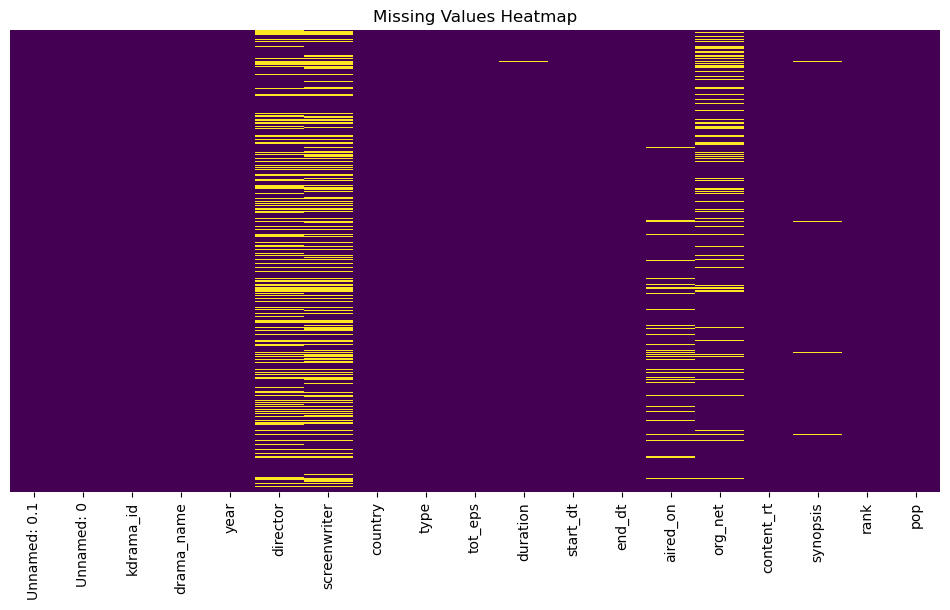

In [24]:
# Visualize missingness
plt.figure(figsize=(12,6))
sns.heatmap(Missing.isnull(), cbar=False, yticklabels=False,
cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Numerical Data Transformations
num_cols = Data.drop('year', axis=1).select_dtypes(include=[np.number]).columns

# For Box-Cox transformation, the data must be positive.
for col in num_cols:
    if col in Data.columns:
        # Check for non-positive values and shift if necessary
        min_val = Data[col].min()
        if min_val <= 0:
            Data[col] = Data[col] + abs(min_val) + 1
        transformed, lam = boxcox(Data[col])
        Data[col + '_boxcox'] = transformed
        print(f"Applied Box-Cox transformation on {col} (lambda: {lam:.4f}).")

num_cols2 = ['pop','n_helpful']
# Standardize numerical features
scaler = StandardScaler()
Data[['pop_std','n_helpful_std']] = scaler.fit_transform(Data[num_cols2])

# Normalize (MinMax scaling)
minmax = MinMaxScaler()
Data[['pop_minmax','n_helpful_minmax']] = minmax.fit_transform(Data[num_cols2])

# Categorical Data Transformations
cat_cols = ['content_rt']
print("\nCategorical columns before encoding:", list(cat_cols))

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(Data, columns=cat_cols, drop_first=True)

# One-hot encoding aired_on
import re
df_encoded['aired_on'] = df_encoded['aired_on'].apply(lambda x: re.split(r",[ \n]*", x))
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
one_hot = {day: [] for day in days}
for aired_days in df_encoded['aired_on']:
    for day in days:
        one_hot[day].append(day in aired_days)
one_hot_df = pd.DataFrame(one_hot)
df_encoded = pd.concat([df_encoded, one_hot_df], axis=1)
df_encoded.drop(['aired_on'], axis=1, inplace=True)

# Optionally, drop or retain the original column
df_encoded.drop(num_cols, axis=1, inplace=True)
print("\nShape after one-hot encoding:", df_encoded.shape)

Applied Box-Cox transformation on tot_eps (lambda: -0.2501).
Applied Box-Cox transformation on duration (lambda: 0.7327).
Applied Box-Cox transformation on rank (lambda: 0.0761).
Applied Box-Cox transformation on pop (lambda: 0.2159).
Applied Box-Cox transformation on music_score (lambda: 2.5040).
Applied Box-Cox transformation on story_score (lambda: 2.2960).
Applied Box-Cox transformation on acting_cast_score (lambda: 3.7727).
Applied Box-Cox transformation on rewatch_value_score (lambda: 1.4414).
Applied Box-Cox transformation on overall_score (lambda: 2.5676).
Applied Box-Cox transformation on n_helpful (lambda: -0.0933).

Categorical columns before encoding: ['content_rt']

Shape after one-hot encoding: (1248, 34)


In [8]:
df_encoded.head()

,title,year,kdrama_id,director,screenwriter,start_dt,end_dt,synopsis,tot_eps_boxcox,duration_boxcox,...,content_rt_G - All Ages,content_rt_Not Yet Rated,content_rt_R - Restricted Screening (nudity & violence),Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,The Family Is Coming,2015,9170c31a02014b56bb4cec2105086f00,['Joo Dong Min'],['Kim Shin Hye'],1/3/2015,3/15/2015,A grandma has abandoned her family 50 years ag...,2.108306,548.978319,...,False,False,False,True,False,False,False,False,False,True
1,The Lover,2015,2dc531911bd1454288c468ed8de78f4e,['Kim Tae Eun'],['Kim Min Seok'],4/2/2015,6/25/2015,The series talk about four different couples l...,1.850703,480.162874,...,False,False,False,False,False,False,False,True,False,False
2,Love of Eve,2015,832b2dcd1ac941348f0dcf54972a7eb0,['Lee Gye Joon'],Others,5/18/2015,10/30/2015,Three women share a close bond that was deeper...,2.791040,407.537869,...,False,False,False,False,True,True,True,True,True,False
3,Love on a Rooftop,2015,5eda227cf639445cbbe1ed6531e28d2d,['Choi Ji Yeong'],"['Choi Min Ki', 'Kim Ji Wan']",4/6/2015,8/21/2015,A drama about a woman who finally becomes a pa...,2.737841,369.428632,...,False,False,False,False,True,True,True,True,True,False
4,"Kill Me, Heal Me",2015,e8c09f0f7d0d4b75a4642eb06d76d811,"['Kim Jin Man', 'Kim Dae Jin']",['Jin Soo Wan'],1/7/2015,3/12/2015,A traumatic childhood experience leaves Cha Do...,2.108306,562.359590,...,False,False,False,False,False,False,True,True,False,False


In [9]:
df_encoded.to_csv('AfterFeatureEngineeringNew.csv')